c:\Users\aruta\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


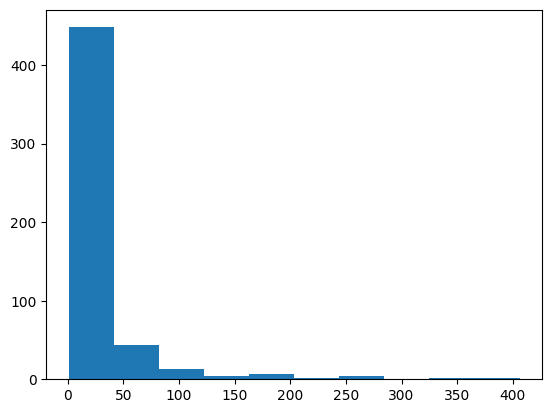

0.8940910897170901
Mean Squared Error: 662.8665136192565
Sommer potrebbe costare 96.77
Di Gregorio potrebbe costare 90.41
Player 'Szczesny' not found, using similar player: Szczesny
Szczesny potrebbe costare 73.19
Dimarco potrebbe costare 129.82
Player 'Calafiori' not found, using similar player: Calafiori
Calafiori potrebbe costare 48.63
Dumfries potrebbe costare 78.93
Buongiorno potrebbe costare 78.93
Acerbi potrebbe costare 40.77
Hernandez T. potrebbe costare 104.37
Bastoni potrebbe costare 78.93
Martinez Quarta potrebbe costare 42.02
Calhanoglu potrebbe costare 155.23
Gudmundsson A. potrebbe costare 143.74
Koopmeiners potrebbe costare 156.49
Pulisic potrebbe costare 167.95
De Ketelaere potrebbe costare 110.74
Orsolini potrebbe costare 110.74
Frattesi potrebbe costare 91.65
Pellegrini Lo. potrebbe costare 111.99
Scamacca potrebbe costare 150.11
Osimhen potrebbe costare 194.61
Thuram potrebbe costare 179.47
Player 'Giroud' not found, using similar player: Giroud
Giroud potrebbe costa

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fuzzywuzzy import fuzz

dataset = pd.read_csv("datasets\Statistiche_Fantacalcio_Stagione_2023_24.csv", sep=';')
dataset2 = pd.read_csv("datasets\Statistiche_Fantacalcio_Stagione_2024_25.csv", sep=';')

dataset["Mv"]  = dataset["Mv"].str.replace(",", ".").astype(float)
dataset2["Mv"]  = dataset2["Mv"].str.replace(",", ".").astype(float)
dataset["Fm"]  = dataset["Fm"].str.replace(",", ".").astype(float)
dataset2["Fm"]  = dataset2["Fm"].str.replace(",", ".").astype(float)

soglia_voto_minimo = float(input("Inserisci la soglia di voto minima: "))
soglia_voto_massimo = float(input("Inserisci la soglia di voto massima: "))
soglia_assist_minimo = float(input("Inserisci la soglia di assist minima: "))
soglia_rigori_minimi_segnati = float(input("Inserisci la soglia di rigori segnati minimi: "))
soglia_rigori_massimo_sbagliati = float(input("Inserisci la soglia di rigori sbagliati massima: "))
soglia_rp_minimi_parati = float(input("Inserisci la soglia di rigori parati minima: "))
soglia_rc_minimi_calciati = float(input("Inserisci la soglia di rigori calciati minima: "))
soglia_amm_max = float(input("Inserisci la soglia di ammunizioni massime: "))
soglia_esp_max = float(input("Inserisci la soglia di espulsioni massime: "))
soglia_au_max = float(input("Inserisci la soglia di autogol massimi: "))

for i in range(0,1):
    if dataset["Nome"][i] in dataset2["Nome"].values:
        portieri_selezionati = dataset[
        (dataset['Mv'] >= soglia_voto_minimo) & 
        (dataset['Mv'] < soglia_voto_massimo) & 
        (dataset['R'] == 'P') & 
        (dataset['Pv'] > 20) &
        (dataset['Rp'] >= soglia_rp_minimi_parati) & 
        (dataset['Amm'] <= soglia_amm_max) & 
        (dataset['Esp'] <= soglia_esp_max) & 
        (dataset['Au'] <= soglia_au_max)
    ].sort_values(by='Fm', ascending=False)

    difensori_selezionati = dataset[
        (dataset['Fm'] >= soglia_voto_minimo) & 
        (dataset['Fm'] < soglia_voto_massimo) & 
        (dataset['R'] == 'D') & 
        (dataset['Pv'] > 20) &
        (dataset['Amm'] <= soglia_amm_max) & 
        (dataset['Esp'] <= soglia_esp_max) & 
        (dataset['Au'] <= soglia_au_max)
    ].sort_values(by='Fm', ascending=False)

    centrocampisti_selezionati = dataset[
        (dataset['Fm'] >= soglia_voto_minimo) & 
        (dataset['Fm'] < soglia_voto_massimo) & 
        (dataset['R'] == 'C') & 
        (dataset['Pv'] > 20) &
        (dataset['Ass']  >= soglia_assist_minimo) &
        (dataset['R+'] >= soglia_rigori_minimi_segnati) &
        (dataset['Rc'] >= soglia_rc_minimi_calciati) &
        (dataset['Amm'] <= soglia_amm_max) & 
        (dataset['Esp'] <= soglia_esp_max) & 
        (dataset['Au'] <= soglia_au_max)
    ].sort_values(by='Fm', ascending=False)

    attaccanti_selezionati = dataset[
        (dataset['Fm'] >= soglia_voto_minimo) & 
        (dataset['Fm'] < soglia_voto_massimo) & 
        (dataset['R'] == 'A') & 
        (dataset['Pv'] > 20) &
        (dataset['Ass']  >= soglia_assist_minimo) &
        (dataset['R+'] >= soglia_rigori_minimi_segnati) &
        (dataset['Rc'] >= soglia_rc_minimi_calciati) &
        (dataset['Amm'] <= soglia_amm_max) & 
        (dataset['Esp'] <= soglia_esp_max) & 
        (dataset['Au'] <= soglia_au_max)
    ].sort_values(by='Fm', ascending=False)

    portieri_finali = portieri_selezionati.head(3)
    difensori_finali = difensori_selezionati.head(8)
    centrocampisti_finali = centrocampisti_selezionati.head(8)
    attaccanti_finali = attaccanti_selezionati.head(6)

    squadra_fantacalcio = pd.concat([portieri_finali, difensori_finali, centrocampisti_finali, attaccanti_finali])
    
lista = []
for i in range(len(squadra_fantacalcio)):
    lista.append(squadra_fantacalcio.iloc[i])

    
def modello():   
    # GESTIONE DATI
    dataset1 = pd.read_csv("datasets\prezzi_2024_25.csv", sep=";")
    dataset2 = pd.read_csv("datasets\datasetPrezzi.csv", sep=";")

    # DISTRIBUZIONE DI UN DATO SPECIFICO
    plt.hist(dataset1['FVM'])
    plt.show()

    # CORRELAZIONE TRA DUE VARIABILI
    correlation = dataset1['Qt.A'].corr(dataset1['FVM'])
    print(correlation)

    # VARIABILI
    X = dataset2[['Qt.A', 'Qt.I', 'Diff.']]
    y = dataset2['FVM']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # STANDARDIZZAZIONE VARIABILI
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # MODELLO, ADDESTRAMENTO E PREDIZIONE
    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # VALUTAZIONE DEL MODELLO
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # PREDIZIONE NUOVI DATI
    def predict_price(player_data):
        if player_data.empty:
            print("No player data found.")
            return None

        player_data_normalized = sc.transform(player_data[['Qt.A', 'Qt.I', 'Diff.']])
        predicted_price = model.predict(player_data_normalized).mean()
        return predicted_price

    def find_similar_player(player_name):
        highest_score = -float('inf')
        most_similar_player = None
        for name in dataset2['Nome'].values:
            score = fuzz.ratio(player_name.lower(), name.lower()) 
            if score > highest_score:
                highest_score = score
                most_similar_player = dataset2[dataset2['Nome'] == name]

        return most_similar_player
    
    crediti = int(input("il numero di crediti è 1000 o 500?: "))
    for i in range(len(lista)):
        nome_giocatore = lista[i]['Nome']

        player_data = dataset1[dataset1['Nome'] == nome_giocatore]
        while player_data.empty:
            similar_player = find_similar_player(nome_giocatore)
            if similar_player is not None:
                player_data = similar_player.copy()
                print(f"Player '{nome_giocatore}' not found, using similar player: {similar_player['Nome'].values[0]}")
            else:
                print(f"Il giocatore {nome_giocatore} non è stato trovato")
                break  
        predicted_price = predict_price(player_data)
        if predicted_price is not None and crediti == 1000:
            print(f"{nome_giocatore} potrebbe costare {predicted_price:.2f}")
        elif predicted_price is not None and crediti == 500:
            print(f"{nome_giocatore} potrebbe costare {(predicted_price) / 2:.2f}")
    
modello = modello()
print(modello) 